# Project 2 - Intro to Data Science - Quiz
_Author: Ly Vinh Hung (Tommy) _

## Introduction

In [ ]:
import pandas as pd
import pandasql
import csv
filename = "weather_underground.csv"
turnstile_weather = "turnstile_data_master_with_weather.csv"

from sympy import init_printing
init_printing()
import sympy as sym
from sympy import *


## Problem set 2 - Data Wrangling

In [12]:
#ps 2.1

def num_rainy_days(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  The SQL query should return one column and
    one row - a count of the number of days in the dataframe where
    the rain column is equal to 1 (i.e., the number of days it
    rained).  The dataframe will be titled 'weather_data'. You'll
    need to provide the SQL query.  You might find SQL's count function
    useful for this exercise.  You can read more about it here:
    
    https://dev.mysql.com/doc/refman/5.1/en/counting-rows.html
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    You can see the weather data that we are passing in below:
    https://www.dropbox.com/s/7sf0yqc9ykpq3w8/weather_underground.csv
    '''
    weather_data = pandas.read_csv(filename)

    q = 'select count(*)  from weather_data where rain == 1'
    
    #Execute your SQL command against the pandas frame
    rainy_days = pandasql.sqldf(q.lower(), locals())
    return rainy_days

print num_rainy_days(filename)


   count(*)
0        10


In [14]:
#ps 2.2
def max_temp_aggregate_by_fog(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  The SQL query should return two columns and
    two rows - whether it was foggy or not (0 or 1) and the max
    maxtempi for that fog value (i.e., the maximum max temperature
    for both foggy and non-foggy days).  The dataframe will be 
    titled 'weather_data'. You'll need to provide the SQL query.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    You can see the weather data that we are passing in below:
    https://www.dropbox.com/s/7sf0yqc9ykpq3w8/weather_underground.csv
    '''
    weather_data = pandas.read_csv(filename)

    q = 'select fog, max(cast (maxtempi as integer)) from weather_data group by fog'
    
    #Execute your SQL command against the pandas frame
    foggy_days = pandasql.sqldf(q.lower(), locals())
    return foggy_days
print max_temp_aggregate_by_fog(filename)

   fog  max(cast (maxtempi as integer))
0    0                               86
1    1                               81


In [15]:
#ps 2.3

def avg_weekend_temperature(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  The SQL query should return one column and
    one row - the average meantempi on days that are a Saturday
    or Sunday (i.e., the the average mean temperature on weekends).
    The dataframe will be titled 'weather_data' and you can access
    the date in the dataframe via the 'date' column.
    
    You'll need to provide  the SQL query.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    Also, you can convert dates to days of the week via the 'strftime' keyword in SQL.
    For example, cast (strftime('%w', date) as integer) will return 0 if the date
    is a Sunday or 6 if the date is a Saturday.
    
    You can see the weather data that we are passing in below:
    https://www.dropbox.com/s/7sf0yqc9ykpq3w8/weather_underground.csv
    '''
    weather_data = pandas.read_csv(filename)

    q = """
    SELECT 
    avg(cast (meantempi as integer)) 
    FROM 
    weather_data 
    WHERE
    cast (strftime('%w', date) as integer) in (0,6)
    """
    
    #Execute your SQL command against the pandas frame
    mean_temp_weekends = pandasql.sqldf(q.lower(), locals())
    return mean_temp_weekends
print avg_weekend_temperature(filename)

   avg(cast (meantempi as integer))
0                         65.111111


In [17]:
# ps 2.4

def avg_min_temperature(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data. More specifically you want to find the average
    minimum temperature (mintempi column of the weather dataframe) on 
    rainy days where the minimum temperature is greater than 55 degrees.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    You can see the weather data that we are passing in below:
    https://www.dropbox.com/s/7sf0yqc9ykpq3w8/weather_underground.csv
    '''
    weather_data = pandas.read_csv(filename)

    q = """
    SELECT 
    avg(mintempi)
    FROM 
    weather_data 
    WHERE 
    rain == 1 and mintempi > 55
    """
    
    #Execute your SQL command against the pandas frame
    avg_min_temp_rainy = pandasql.sqldf(q.lower(), locals())
    return avg_min_temp_rainy

print avg_min_temperature(filename)

   avg(mintempi)
0          61.25


In [ ]:
#ps 2.5
filenames = ["turnstile_110507.txt"]
import csv

def fix_turnstile_data(filenames):
    '''
    Filenames is a list of MTA Subway turnstile text files. A link to an example
    MTA Subway turnstile text file can be seen at the URL below:
    http://web.mta.info/developers/data/nyct/turnstile/turnstile_110507.txt
    
    As you can see, there are numerous data points included in each row of the
    a MTA Subway turnstile text file. 

    You want to write a function that will update each row in the text
    file so there is only one entry per row. A few examples below:
    A002,R051,02-00-00,05-28-11,00:00:00,REGULAR,003178521,001100739
    A002,R051,02-00-00,05-28-11,04:00:00,REGULAR,003178541,001100746
    A002,R051,02-00-00,05-28-11,08:00:00,REGULAR,003178559,001100775
    
    Write the updates to a different text file in the format of "updated_" + filename.
    For example:
        1) if you read in a text file called "turnstile_110521.txt"
        2) you should write the updated data to "updated_turnstile_110521.txt"

    The order of the fields should be preserved. Remember to read through the 
    Instructor Notes below for more details on the task. 
    
    In addition, here is a CSV reader/writer introductory tutorial:
    http://goo.gl/HBbvyy
    
    You can see a sample of the turnstile text file that's passed into this function
    and the the corresponding updated file in the links below:
    
    Sample input file:
    https://www.dropbox.com/s/mpin5zv4hgrx244/turnstile_110528.txt
    Sample updated file:
    https://www.dropbox.com/s/074xbgio4c39b7h/solution_turnstile_110528.txt
    '''
    for name in filenames:
        #create file input object f_in to work with filenames  
        f_in = open(name, 'r')
        f_out = open('updated_' + name, 'w')
        #create csv reader and writer based on file object
        reader_in = csv.reader(f_in, delimiter = ',')
        writer_out = csv.writer(f_out, delimiter = ',')
       
        for line in reader_in:
            header = line[:3]
            for i in xrange(3, len(line), 5):
                writer_out.writerow(header + line[i:i+5])
                
fix_turnstile_data(filenames)

In [ ]:
#ps 2.6
def create_master_turnstile_file(filenames, output_file):
    '''
    Write a function that takes the files in the list filenames, which all have the 
    columns 'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn', and consolidates
    them into one file located at output_file.  There should be ONE row with the column
    headers, located at the top of the file. The input files do not have column header
    rows of their own.
    
    For example, if file_1 has:
    line 1 ...
    line 2 ...
    
    and another file, file_2 has:
    line 3 ...
    line 4 ...
    line 5 ...
    
    We need to combine file_1 and file_2 into a master_file like below:
     'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
    line 1 ...
    line 2 ...
    line 3 ...
    line 4 ...
    line 5 ...
    '''
    with open(output_file, 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for filename in filenames:
            # your code here
            master_file.write(''.join(open(filename).readlines()))
        master_file.close()  
        
create_master_turnstile_file(filenames, output_file)

In [16]:
#ps 2.7
import pandas
def filter_by_regular(filename):
    '''
    This function should read the csv file located at filename into a pandas dataframe,
    and filter the dataframe to only rows where the 'DESCn' column has the value 'REGULAR'.
    
    For example, if the pandas dataframe is as follows:
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231
    
    The dataframe will look like below after filtering to only rows where DESCn column
    has the value 'REGULAR':
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    '''
    
    turnstile_data = pandas.read_csv("turnstile_data_master_with_weather.csv")
    turnstile_data = turnstile_data[turnstile_data.DESCn == 'REGULAR']
    # more of your code here
    return turnstile_data  
print filter_by_regular(filename).head()  



   Unnamed: 0  UNIT       DATEn     TIMEn  Hour    DESCn  ENTRIESn_hourly  \
0           0  R001  2011-05-01  01:00:00     1  REGULAR                0   
1           1  R001  2011-05-01  05:00:00     5  REGULAR              217   
2           2  R001  2011-05-01  09:00:00     9  REGULAR              890   
3           3  R001  2011-05-01  13:00:00    13  REGULAR             2451   
4           4  R001  2011-05-01  17:00:00    17  REGULAR             4400   

   EXITSn_hourly  maxpressurei  maxdewpti   ...     meandewpti  meanpressurei  \
0              0         30.31         42   ...             39          30.27   
1            553         30.31         42   ...             39          30.27   
2           1262         30.31         42   ...             39          30.27   
3           3708         30.31         42   ...             39          30.27   
4           2501         30.31         42   ...             39          30.27   

   fog  rain  meanwindspdi  mintempi  meantempi  m

In [23]:
#ps 2.8

df = pandas.read_csv("turnstile_data_master_with_weather.csv")

def get_hourly_entries(df):
    '''
    The data in the MTA Subway Turnstile data reports on the cumulative
    number of entries and exits per row.  Assume that you have a dataframe
    called df that contains only the rows for a particular turnstile machine
    (i.e., unique SCP, C/A, and UNIT).  This function should change
    these cumulative entry numbers to a count of entries since the last reading
    (i.e., entries since the last row in the dataframe).
    
    More specifically, you want to do two things:
       1) Create a new column called ENTRIESn_hourly
       2) Assign to the column the difference between ENTRIESn of the current row 
          and the previous row. If there is any NaN, fill/replace it with 1.
    
    You may find the pandas functions shift() and fillna() to be helpful in this exercise.
    
    Examples of what your dataframe should look like at the end of this exercise:
    
           C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243
    ...
    ...

    '''
    #your code here
    df['ENTRIESn_hourly'] = df['ENTRIESn'] - df['ENTRIESn'].shift(periods=1)
    df['ENTRIESn_hourly'] = df['ENTRIESn_hourly'].fillna(1)
    return df
print get_hourly_entries(df).head()  


KeyError: 'ENTRIESn'

In [24]:
#ps 2.9

def get_hourly_exits(df):
    '''
    The data in the MTA Subway Turnstile data reports on the cumulative
    number of entries and exits per row.  Assume that you have a dataframe
    called df that contains only the rows for a particular turnstile machine
    (i.e., unique SCP, C/A, and UNIT).  This function should change
    these cumulative exit numbers to a count of exits since the last reading
    (i.e., exits since the last row in the dataframe).
    
    More specifically, you want to do two things:
       1) Create a new column called EXITSn_hourly
       2) Assign to the column the difference between EXITSn of the current row 
          and the previous row. If there is any NaN, fill/replace it with 0.
    
    You may find the pandas functions shift() and fillna() to be helpful in this exercise.
    
    Example dataframe below:

          Unnamed: 0   C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly  EXITSn_hourly
    0              0  A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                0              0
    1              1  A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23              8
    2              2  A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18             18
    3              3  A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71             54
    4              4  A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170             44
    5              5  A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214             42
    6              6  A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87             11
    7              7  A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10              3
    8              8  A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36             89
    9              9  A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153            333
    '''
    
    #your code here
    df['EXITSn_hourly'] = df['EXITSn'] - df['EXITSn'].shift(periods=1)
    df['EXITSn_hourly'] = df['EXITSn_hourly'].fillna(0)
    return df
print get_hourly_exits(df).head()


KeyError: 'EXITSn'

In [44]:
#ps 2.10
time = df['TIMEn'][15]

def time_to_hour(time):
    '''
    Given an input variable time that represents time in the format of:
    "00:00:00" (hour:minutes:seconds)
    
    Write a function to extract the hour part from the input variable time
    and return it as an integer. For example:
        1) if hour is 00, your code should return 0
        2) if hour is 01, your code should return 1
        3) if hour is 21, your code should return 21
        
    Please return hour as an integer.
    '''
    
    hour = int(time.split(':')[0])
    return hour
print time_to_hour(time)


 16


In [36]:
#ps 2.11
from datetime import datetime
import time

date = df['DATEn'][0]

def reformat_subway_dates(date):
    '''
    The dates in our subway data are formatted in the format month-day-year.
    The dates in our weather underground data are formatted year-month-day.
    
    In order to join these two data sets together, we'll want the dates formatted
    the same way.  Write a function that takes as its input a date in the MTA Subway
    data format, and returns a date in the weather underground format.
    
    Hint: 
    There are a couple of useful functions in the datetime library that will
    help on this assignment, called strptime and strftime. 
    More info can be seen here and further in the documentation section:
    http://docs.python.org/2/library/datetime.html#datetime.datetime.strptime
    '''
    date_formatted = datetime.strptime(date, '%m-%d-%y').strftime('%Y-%m-%d')
    return date_formatted


## Problem set 3 -  Data Analysis

<module 'matplotlib.pyplot' from '/Users/tommyly/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


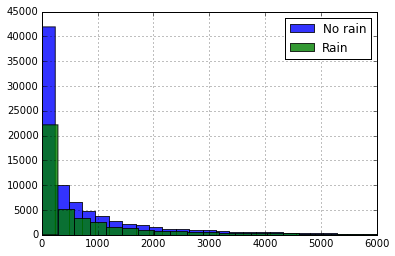

In [65]:
#ps 3.1 -  Data analysis
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    
    Your histogram may look similar to bar graph in the instructor notes below.
    
    You can read a bit about using matplotlib and pandas to plot histograms here:
    http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
    You can see the information contained within the turnstile weather data here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    
    turnstile_weather = pandas.read_csv("turnstile_data_master_with_weather.csv")
    plt.figure()
    turnstile_weather[turnstile_weather['rain'] == 0]['ENTRIESn_hourly'].hist(bins=180, alpha = 0.8, label="No rain").set_xlim([0, 6000]) 
    turnstile_weather[turnstile_weather['rain'] == 1]['ENTRIESn_hourly'].hist(bins=180, alpha = 0.8, label="Rain").set_xlim([0, 6000])
    plt.legend()
    return plt

print entries_histogram(turnstile_weather)

In [4]:
#ps 3.3
import numpy as np
import scipy
import scipy.stats
import pandas

def mann_whitney_plus_means(turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    
    You should feel free to use scipy's Mann-Whitney implementation, and you 
    might also find it useful to use numpy's mean function.
    
    Here are the functions' documentation:
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    
    You can look at the final turnstile weather data at the link below:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    
    ### YOUR CODE HERE ###
    
    with_rain = turnstile_weather[turnstile_weather['rain'] == 1]['ENTRIESn_hourly']
    
    without_rain = turnstile_weather[turnstile_weather['rain'] == 0]['ENTRIESn_hourly']
    
    with_rain_mean = with_rain.mean()
    
    without_rain_mean = without_rain.mean()

    U, p = scipy.stats.mannwhitneyu(with_rain, without_rain)
    
    return with_rain_mean, without_rain_mean, U, p # leave this line for the grader
mann_whitney_plus_means(turnstile_weather)

(1105.4463767458733, 1090.278780151855, 1924409167.0, 0.024999912793489721)

In [37]:
#ps 3.5

import numpy as np
import pandas
import statsmodels.api as sm

"""
In this question, you need to:
1) implement the linear_regression() procedure
2) Select features (in the predictions procedure) and make predictions.

"""

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    
    This can be the same code as in the lesson #3 exercise.
    """
 
    features = sm.add_constant(features)
    model = sm.OLS(values, features)
    results = model.fit()
    intercept = results.params[0]
    params = results.params[1:]
    
    return intercept, params

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~10%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this exercise on your own computer, locally. If you do, you may want to complete Exercise
    8 using gradient descent, or limit your number of features to 10 or so, since ordinary
    least squares can be very slow for a large number of features.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a
    smaller number of features.
    '''
   
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi', 'meanwindspdi']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']

    # Perform linear regression
    intercept, params = linear_regression(features, values)
    
    predictions = intercept + np.dot(features, params)
    return predictions

In [66]:
#ps 3.6
import numpy as np
import scipy
import matplotlib.pyplot as plt

def plot_residuals(turnstile_weather, predictions):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).
    Try different binwidths for your histogram.

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
    plt.figure()
    (turnstile_weather['ENTRIESn_hourly'] - predictions).hist(bins=100)
    plt.legend()
    return plt
print plot_residuals(turnstile_weather, predictions)


TypeError: unsupported operand type(s) for -: 'float' and 'function'

In [47]:
#ps 3.7

import numpy as np
import scipy
import matplotlib.pyplot as plt
import sys

def compute_r_squared(data, predictions):
    '''
    In exercise 5, we calculated the R^2 value for you. But why don't you try and
    and calculate the R^2 value yourself.
    
    Given a list of original data points, and also a list of predicted data points,
    write a function that will compute and return the coefficient of determination (R^2)
    for this data.  numpy.mean() and numpy.sum() might both be useful here, but
    not necessary.

    Documentation about numpy.mean() and numpy.sum() below:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
    '''
    
    # your code here
    r_squared = 1 - np.sum(np.square(data - predictions)) / np.sum(np.square(data - np.mean(data)))
    return r_squared
print compute_r_squared(turnstile_weather['ENTRIESn_hourly'], predictions)


R^2: 

TypeError: unsupported operand type(s) for -: 'float' and 'function'

In [ ]:
#ps 3.8
import numpy as np
import pandas
from sklearn.linear_model import SGDRegressor


"""
In this question, you need to:
1) Implement the linear_regression() procedure using gradient descent.
   You can use the SGDRegressor class from sklearn, since this class uses gradient descent.
2) Select features (in the predictions procedure) and make predictions.

"""

def normalize_features(features):
    ''' 
    Returns the means and standard deviations of the given features, along with a normalized feature
    matrix.
    ''' 
    means = np.mean(features, axis=0)
    std_devs = np.std(features, axis=0)
    normalized_features = (features - means) / std_devs
    return means, std_devs, normalized_features

def recover_params(means, std_devs, norm_intercept, norm_params):
    ''' 
    Recovers the weights for a linear model given parameters that were fitted using
    normalized features. Takes the means and standard deviations of the original
    features, along with the intercept and parameters computed using the normalized
    features, and returns the intercept and parameters that correspond to the original
    features.
    ''' 
    intercept = norm_intercept - np.sum(means * norm_params / std_devs)
    params = norm_params / std_devs
    return intercept, params

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    """
    
    ###########################
    ### YOUR CODE GOES HERE ###
    ###########################
    reg = SGDRegressor(n_iter=40)
    reg.fit(features, values)
    intercept = reg.intercept_
    params = reg.coef_
    
    
    return intercept, params

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subset (~50%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this exercise on your own computer, locally.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a
    smaller number of features or fewer iterations.
    '''
    ################################ MODIFY THIS SECTION #####################################
    # Select features. You should modify this section to try different features!             #
    # We've selected rain, precipi, Hour, meantempi, and UNIT (as a dummy) to start you off. #
    # See this page for more info about dummy variables:                                     #
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html          #
    ##########################################################################################
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi', 'meanwindspdi','meandewpti']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    
    # Get numpy arrays
    features_array = features.values
    values_array = values.values
    
    means, std_devs, normalized_features_array = normalize_features(features_array)

    # Perform gradient descent
    norm_intercept, norm_params = linear_regression(normalized_features_array, values_array)
    
    intercept, params = recover_params(means, std_devs, norm_intercept, norm_params)
    
    predictions = intercept + np.dot(features_array, params)
    # The following line would be equivalent:
    # predictions = norm_intercept + np.dot(normalized_features_array, norm_params)
    
    return predictions

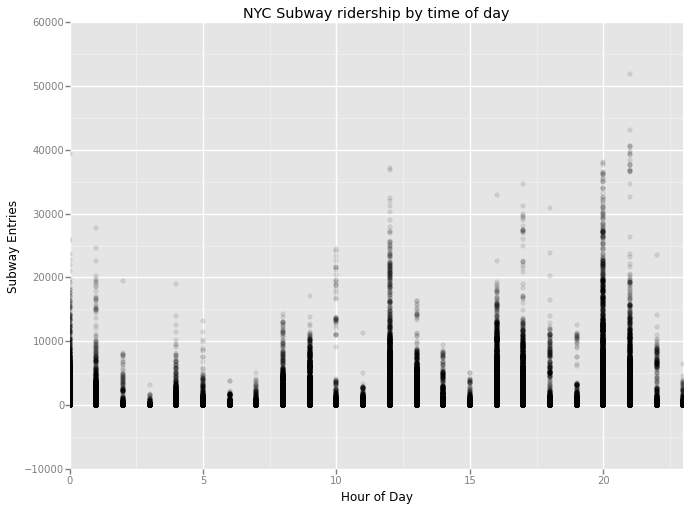

<ggplot: (276636581)>

In [63]:
#ps 4.1
from pandas import *
from ggplot import *

def plot_weather_data(turnstile_weather):
    '''
    You are passed in a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make a data visualization
    focused on the MTA and weather data we used in assignment #3.  
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.  

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time of day or day of week
     * How ridership varies based on Subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
     
    To see all the columns and data points included in the turnstile_weather 
    dataframe. 
     
    However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''
    #gg = ggplot(data,aes('yearID','HR')) + geom_point(color ='red')+ geom_line(color='red') + ggtitle('Home Runs Per Year') + xlab('YearID') + ylab('HR')
    plot = ggplot(turnstile_weather, aes('Hour','ENTRIESn_hourly')) +\
           geom_point(color = "black", alpha = 0.1,position = "jitter=0.1") +\
           scale_x_discrete(limits=[0,23]) +\
           ggtitle('NYC Subway ridership by time of day') + xlab('Hour of Day') + ylab('Subway Entries')
    
    return plot

plot_weather_data(turnstile_weather)

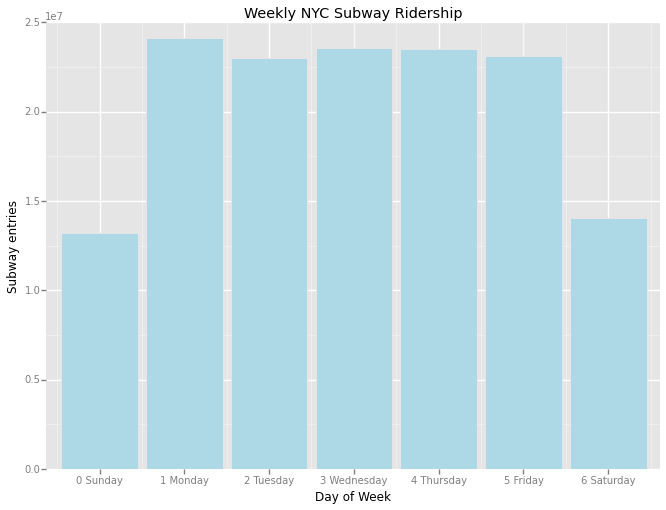

<ggplot: (278429665)>

In [60]:
#ps 4.2
from pandas import *
from ggplot import *

def plot_weather_data(turnstile_weather):
    ''' 
    plot_weather_data is passed a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make another data visualization
    focused on the MTA and weather data we used in Project 3.
    
    Make a type of visualization different than what you did in the previous exercise.
    Try to use the data in a different way (e.g., if you made a lineplot concerning 
    ridership and time of day in exercise #1, maybe look at weather and try to make a 
    histogram in this exercise). Or try to use multiple encodings in your graph if 
    you didn't in the previous exercise.
    
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time-of-day or day-of-week
     * How ridership varies by subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out the link 
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    to see all the columns and data points included in the turnstile_weather 
    dataframe.
     
   However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''
    day = turnstile_weather[['DATEn', 'ENTRIESn_hourly']].groupby('DATEn', as_index=False).sum()
    
    day['Day'] = [datetime.strptime(x, '%Y-%m-%d').strftime('%w %A') for x in day['DATEn']]
    
    weekday = day[['Day', 'ENTRIESn_hourly']].groupby('Day', as_index=False).sum()
    
    plot = ggplot(weekday, aes(x='Day', y='ENTRIESn_hourly')) +\
                                      geom_bar(aes(weight='ENTRIESn_hourly'), fill='lightblue',stat='identity',position = "jitter") +\
                                      ggtitle('Weekly NYC Subway Ridership') +\
                                      xlab('Day of Week') +\
                                      ylab('Subway entries')

    return plot
plot_weather_data(turnstile_weather)